In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras import Input
import keras.activations as act
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error 

2025-10-28 00:29:12.320145: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-28 00:29:27.805556: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-28 00:29:36.314542: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
df = pd.read_csv('./melting-point/train_wc_scaled.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,Tm
0,-0.754432,-0.420951,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.101141,-0.769107,-0.213163,...,-0.145254,-0.231291,-0.106936,-0.147910,-0.093205,-0.092155,-0.220299,-0.127967,-0.138119,213.15
1,-0.754432,-0.420951,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.101141,2.583646,3.583801,...,-0.145254,-0.231291,-0.106936,5.971282,-0.093205,-0.092155,7.364493,-0.127967,-0.138119,407.15
2,0.721068,-0.141226,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.101141,0.571994,-0.213163,...,-0.145254,-0.231291,-0.106936,-0.147910,-0.093205,-0.092155,3.572097,-0.127967,-0.138119,324.15
3,-0.016682,-0.420951,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.101141,-0.769107,-0.213163,...,-0.145254,-0.231291,-0.106936,-0.147910,-0.093205,-0.092155,-0.220299,-0.127967,-0.138119,351.15
4,0.721068,0.418224,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.101141,-0.769107,-0.213163,...,-0.145254,-0.231291,-0.106936,-0.147910,-0.093205,-0.092155,-0.220299,-0.127967,-0.138119,126.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,-0.754432,-0.141226,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.101141,-0.769107,-0.213163,...,-0.145254,-0.231291,-0.106936,-0.147910,-0.093205,-0.092155,-0.220299,-0.127967,-0.138119,256.45
2561,-0.754432,-0.420951,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.101141,-0.769107,-0.213163,...,-0.145254,-0.231291,-0.106936,-0.147910,-0.093205,-0.092155,-0.220299,-0.127967,-0.138119,231.15
2562,-0.754432,-0.420951,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.101141,1.242544,3.583801,...,-0.145254,-0.231291,-0.106936,-0.147910,-0.093205,-0.092155,-0.220299,7.166150,6.303231,256.25
2563,-0.016682,-0.141226,-0.277852,-0.178342,-0.178139,-0.138119,-0.116084,-0.101141,1.577820,3.583801,...,-0.145254,-0.231291,-0.106936,-0.147910,-0.093205,-0.092155,3.572097,-0.127967,6.303231,333.15


In [3]:
melting_point={}
melting_point["data"] = df.drop(['Tm'], axis=1).values
melting_point["target"] = df["Tm"].values

In [4]:
rows = len(melting_point['data'][0])

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(melting_point["data"], melting_point["target"], test_size=0.1)

# Rede neural

In [6]:
def build_model(lr=0.001):
    model = Sequential()

    #337
    model.add(Input(shape=(rows,)))

    model.add(Dense(rows))
    model.add(Activation(act.sigmoid))

    model.add(Dense(rows//2))
    model.add(Activation(act.leaky_relu))

    model.add(Dense(1))
    
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_absolute_error', metrics=['r2_score'])
    return model

regressor = KerasRegressor(model=build_model, epochs=100, batch_size=32, verbose=0.5, lr=0.001)

In [7]:
regressor.fit(X_train, 
          Y_train, 
          epochs=100, 
          batch_size=64,
          validation_data=(X_test, Y_test)) 

Epoch 1/100


2025-10-28 00:29:38.750997: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

,model,<function bui...x74b9455736a0>
,build_fn,None
,warm_start,False
,random_state,None
,optimizer,'rmsprop'
,loss,None
,metrics,None
,batch_size,32
,validation_batch_size,None
,verbose,0.5
,callbacks,None


In [8]:
pred = regressor.predict(X_test)

print("R2 score:", regressor.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.46104380450483384
Mean Absolute error: 37.35090955682301


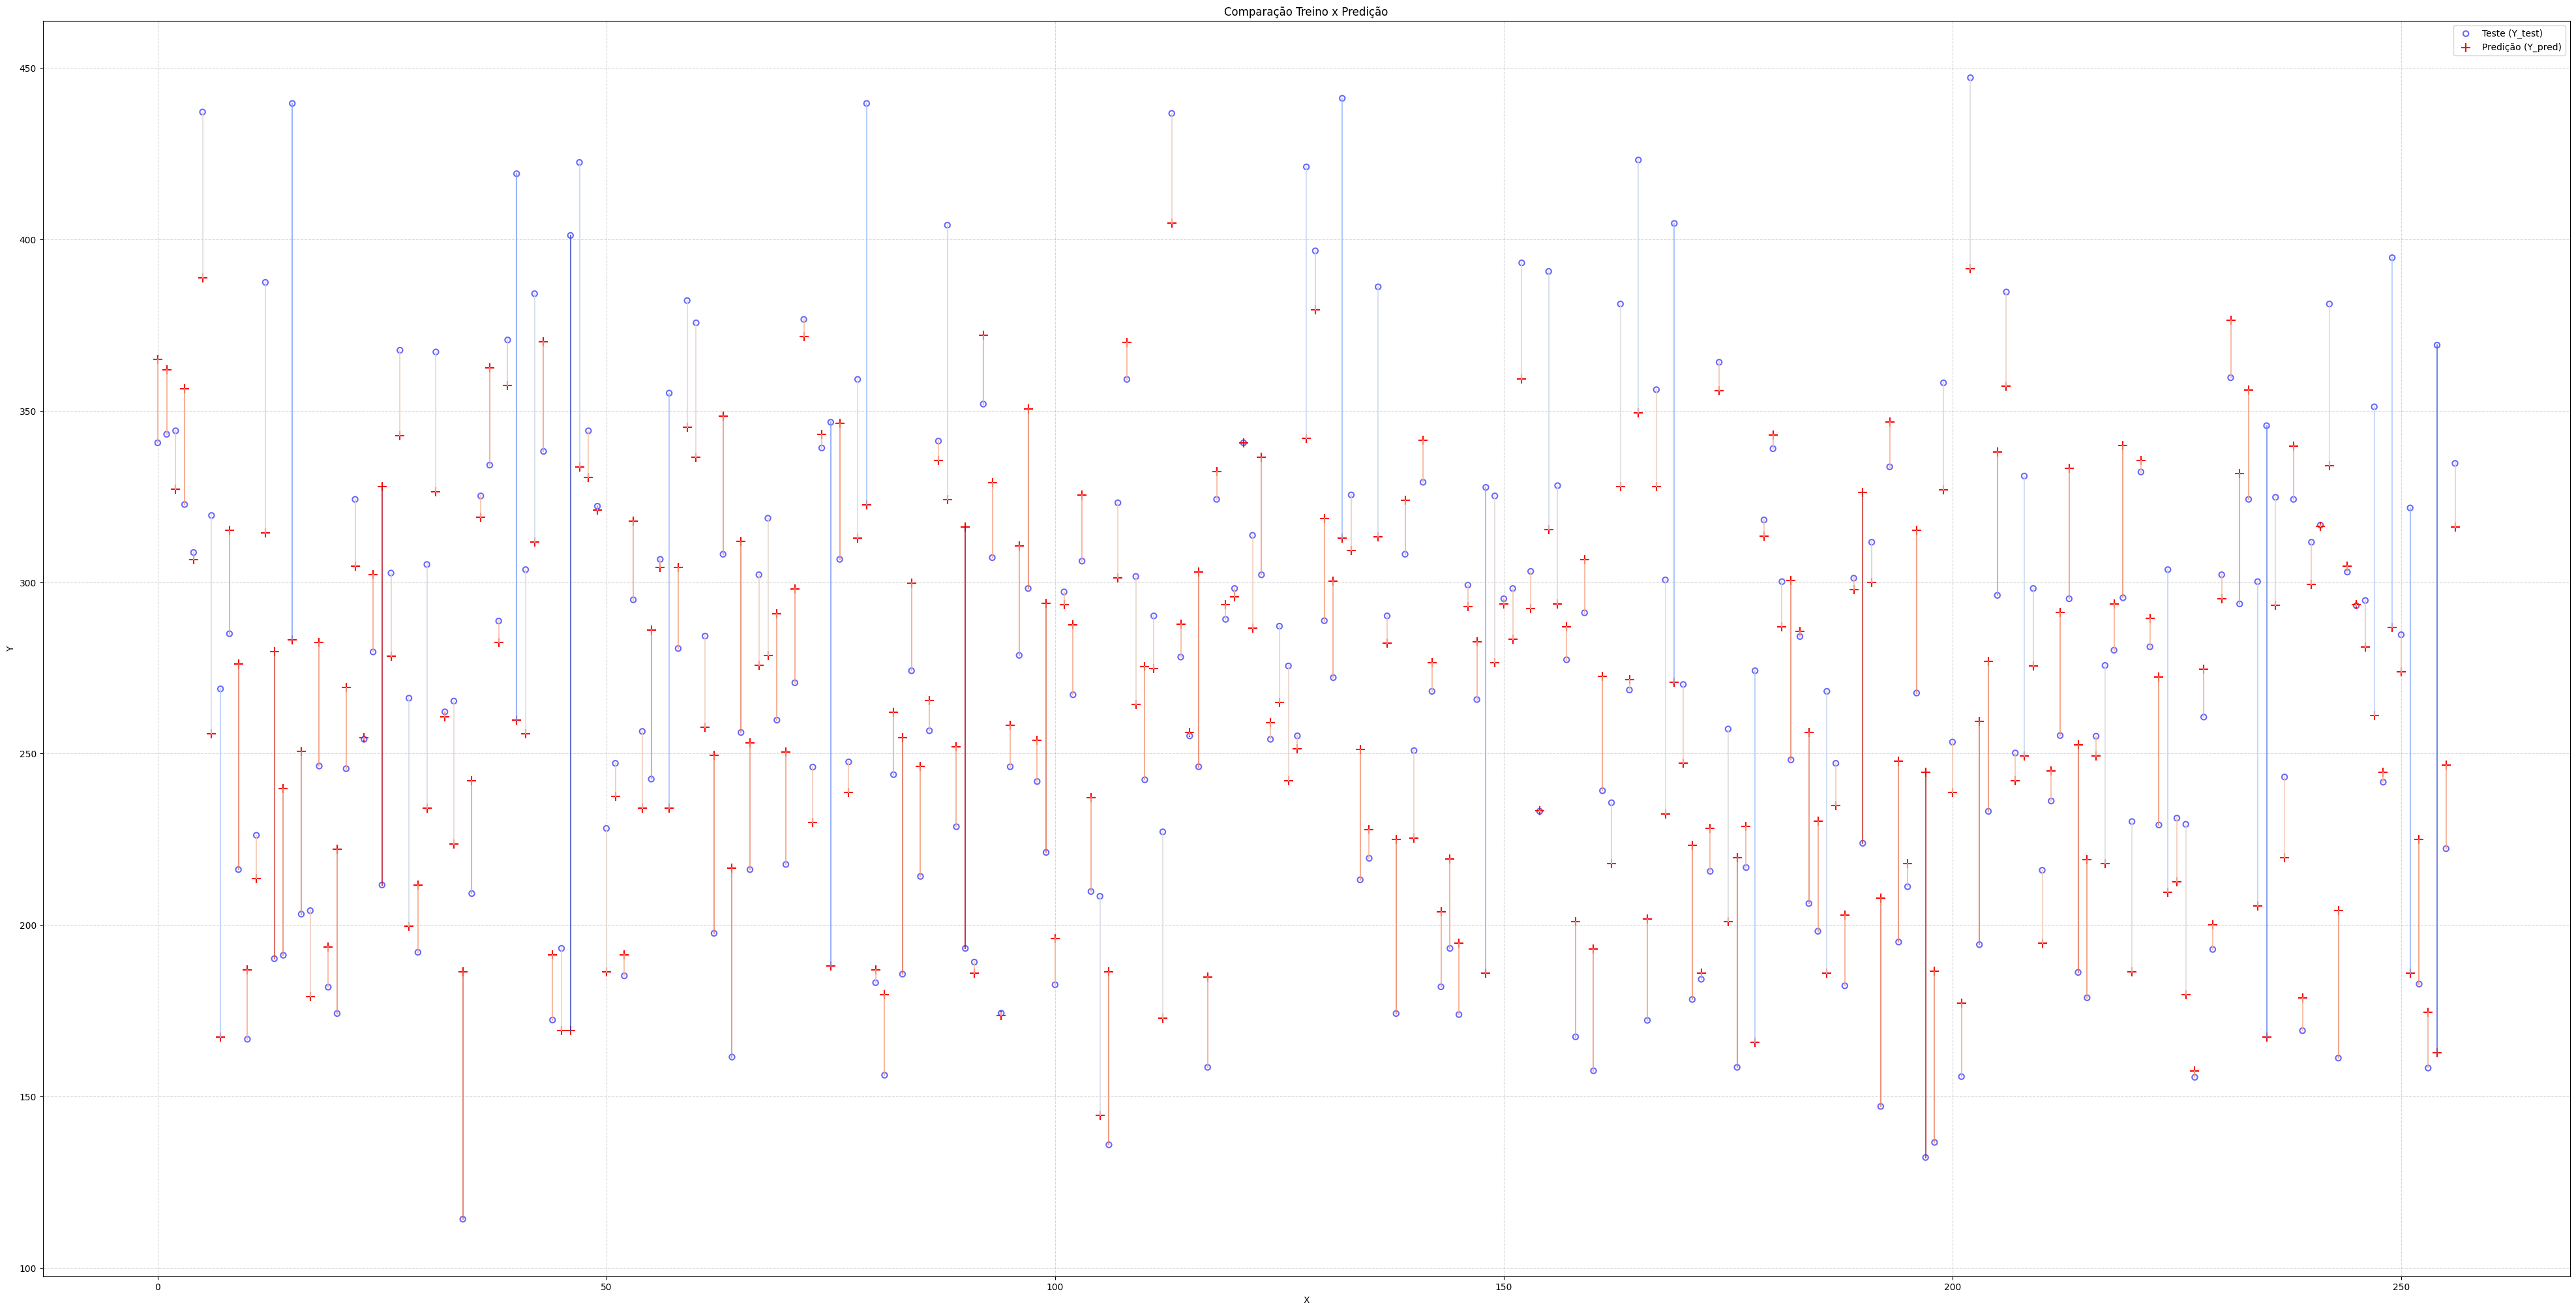

In [9]:
plt.figure(figsize=(50, 25))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

diff = pred - Y_test

norm = Normalize(vmin=np.min(diff), vmax=np.max(diff))
cmap = plt.cm.coolwarm  # azul pra negativo, vermelho pra positivo

for x, y_real, y_est, d in zip(x_range, Y_test, pred, diff):
    cor = cmap(norm(d))
    plt.plot([x, x], [y_real, y_est], color=cor, linewidth=1.5, alpha=0.8)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [10]:
print("Mean Absolute Error:")
nn_scores = cross_val_score(regressor, melting_point["data"], melting_point["target"], cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
print(nn_scores)
print(nn_scores.mean())
print(nn_scores.std())

print("R2:")
nn_r2_scores = cross_val_score(regressor, melting_point["data"], melting_point["target"], cv=10, n_jobs=-1, scoring='r2')
print(nn_r2_scores)
print(nn_r2_scores.mean())
print(nn_r2_scores.std())

print("Explained Variance:")
nn_ev_scores = cross_val_score(regressor, melting_point["data"], melting_point["target"], cv=10, n_jobs=-1, scoring='explained_variance')
print(nn_ev_scores)
print(nn_ev_scores.mean())
print(nn_ev_scores.std())

Mean Absolute Error:


2025-10-28 00:29:55.208717: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-28 00:29:55.208717: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-28 00:29:55.279171: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-28 00:29:55.302983: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-28 00:29:58.366919: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31]

Epoch 1/100
Epoch 1/100
Epoch 2/100
Epoch 2/100
Epoch 3/100
Epoch 3/100
Epoch 4/100
Epoch 4/100
Epoch 5/100
Epoch 5/100
Epoch 6/100
Epoch 6/100
Epoch 7/100
Epoch 7/100
Epoch 8/100
Epoch 8/100
Epoch 9/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 12/100
Epoch 13/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 14/100
Epoch 16/100
Epoch 17/100
Epoch 15/100
Epoch 18/100
Epoch 16/100
Epoch 17/100
Epoch 19/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 20/100
Epoch 21/100
Epoch 21/100
Epoch 22/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 25/100
Epoch 26/100
Epoch 26/100
Epoch 27/100
Epoch 27/100
Epoch 28/100
Epoch 28/100
Epoch 29/100
Epoch 29/100
Epoch 30/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 31/100
Epoch 33/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 38/100
Epoch 40/100
Epoc